In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Setup + Data

In [24]:
np.random.seed(42) # For reproducibility

# Generate synthetic data
time = np.arange(0, 500)
signal = np.sin(0.02 * time) + np.random.normal(0, 0.2, len(time))

# Inject anomalies
anomalies = [100, 200, 300, 450]
signal[anomalies] += np.array([3, -4, 5, -3.5]) 

df = pd.DataFrame({'time': time, 'signal': signal})
print(df.head())

   time    signal
0     0  0.099343
1     1 -0.007654
2     2  0.169527
3     3  0.364570
4     4  0.033084


# 2. Visualize the data

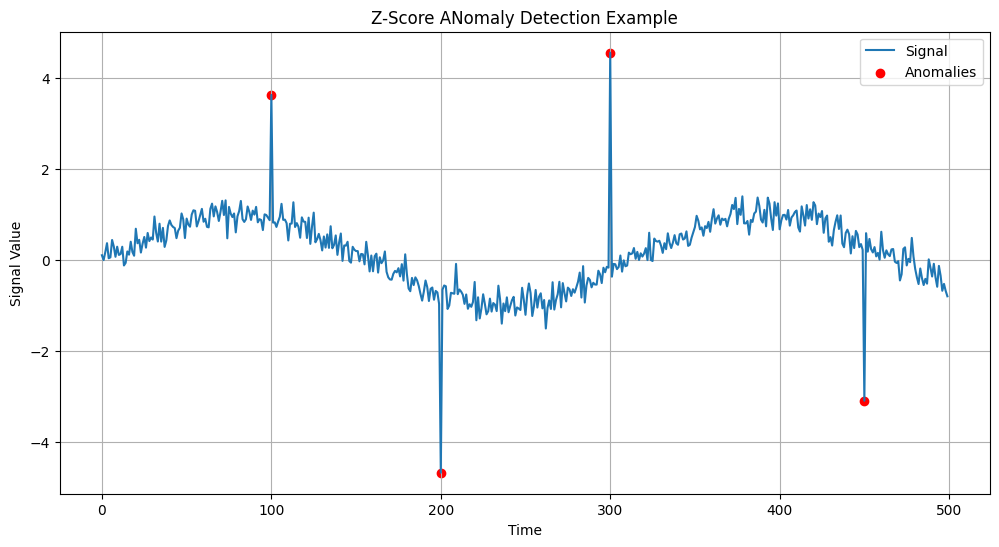

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['signal'], label='Signal')
plt.scatter(df['time'][anomalies], df['signal'][anomalies], color='red', label='Anomalies')

plt.title("Z-Score ANomaly Detection Example")
plt.xlabel("Time")
plt.ylabel("Signal Value")
plt.legend()
plt.grid()
plt.show()

# 3. Compute Z-Scores

In [ ]:
mean = df['signal'].mean()
std= df['signal'].std()

df['z_score'] = (df['signal'] - mean) / std
df['anomaly'] = np.abs(df['z_score']) > 3

df.head()
print(df['anomaly'].value_counts())
#print anomalies records
anomalies = df['anomaly']
print(df[anomalies])


anomaly
False    496
True       4
Name: count, dtype: int64
     time    signal   z_score  anomaly
100   100  3.626223  4.422137     True
200   200 -4.685245 -6.264128     True
300   300  4.554785  5.616013     True
450   450 -3.100417 -4.226475     True


# 4. Visualize the anomalies

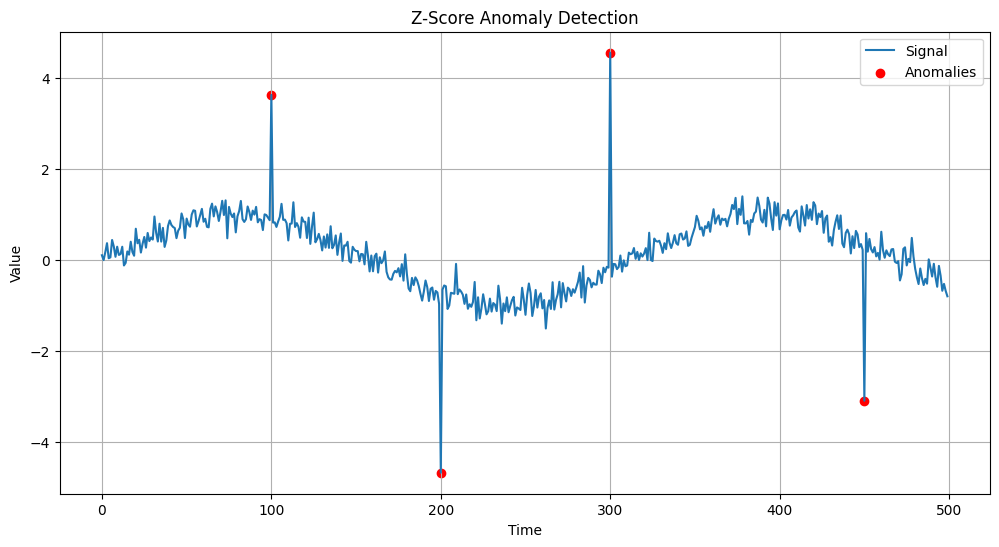

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['signal'], label='Signal')
plt.scatter(df['time'][df['anomaly']], df['signal'][df['anomaly']], color='red', label='Anomalies')


plt.title("Z-Score Anomaly Detection")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()